## **Artificial Neural Network (ANN) from scratch: a feed-forward model example**

A feedforward neural network is an artificial neural network wherein connections between the nodes do not form a cycle. As such, it is 
different from recurrent neural networks. 

The feedforward neural network was the first and simplest type of artificial neural network devised. In this network, the information moves in only one direction, forward, from the input nodes, through the hidden nodes (if any) and to the output nodes. There are no cycles or loops in the network.

(Source: wikipedia.com)

---

We will construct a basic neural network in 3 simple steps:

1. **Load sample data with Scikit Learn**
2. **Define activation function that the neural network will use**
3. **Construct feed-forward calculation logic to get from input to the final output layer**

---

#### Step 1: *We'll start with making some random data with the make_moons method in Scikit Learn*

In [1]:
## Import all necessary packages
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from math import e
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
## Load data from sklearn datasets
X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

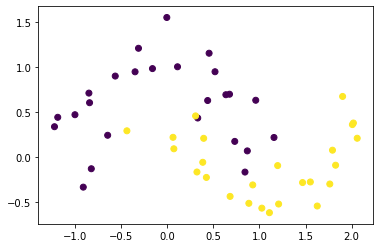

In [3]:
## Visalizing the make_moons dataset that we will want our model to correctly categorize after some training
plt.scatter(X[:,0], X[:,1], c=y)

#### Step 2: *Define the activiation function - we will use a sigmoid function in our NN model*

In [4]:
## Activation function 1
def sigmoid(x):
    return 1 / (1 + e ** -x)

In [5]:
## Activation function 2 (this is optional - just as an example of a different activation function)
def tanh(x):
    return (e**x - e**-x) / (e**x + e**-x)

#### *In addition to the data X and y, we also need to initialize random weights for our model*

In [6]:
## Create the first layer of weights and verify that they have a shape of (3,2)
weights0 = np.random.rand(3,2)
assert weights0.shape == (3,2)

In [7]:
## Create second layer of weights and verify that they have a shape of (3,1)
weights1 = np.random.rand(3,1)
assert weights1.shape == (3,1)

#### Step 3: *Implement the Feed-Forward Function with one hidden layer and sigmoid activation functions*

In [8]:
def feed_forward_sigmoid(X, w0, w1):
    ## 1: X data is (50,2)
    assert X.shape == (50,2)
    
    ## 2: add a bias columns, so X turns from (50,2) to (50,3) with added 1s
    X = np.hstack((X,np.ones((X.shape[0],1))))
    
    ## 3: dot product of X with weights0
    d1 = np.dot(X, w0)
    
    ## 4: apply sigmoid activation function to each value in d1
    s1 = sigmoid(d1)
    
    ## 5: add bias column to the hidden layer -> this makes it (50,3), incl. bias
    h1 = np.hstack((s1, np.ones((s1.shape[0],1))))
    
    ## 6: dot pdocut of hidden layer h1 and weights1
    d2 = np.dot(h1, w1)
    
    ## 7: apply sigmoid function to get the output layer
    o2 = sigmoid(d2)
    
    return h1, o2

#### So we just made a simple, 2-layer neural network from scratch!

In [9]:
## Implementing this feed forward results in a set of probabilities
hidden_layer, y_prob = feed_forward_sigmoid(X, weights0, weights1)

In [10]:
## Let's look at the actual predictions and accuracy score
def predict(output_probabilities):
    return np.array([np.round(x) for x in output_probabilities])

y_pred = predict(y_prob).flatten()
accuracy_score(y, y_pred)

0.5

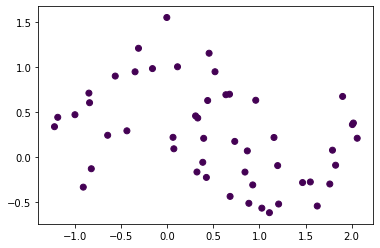

In [11]:
## Visalizing the make_moons dataset that we will want our model to correctly categorize after some training
plt.scatter(X[:,0], X[:,1], c=y_pred)

#### **The predictions do not look too good due to the randomly initialized weights...our model still needs to be trained!**

#### Training of the model will use a backpropagation algorythm

---